Decision Tree Metrics: {'Accuracy': 0.665, 'Precision': 0.43859649122807015, 'Recall': 0.4166666666666667, 'F1-Score': 0.42735042735042733, 'ROC-AUC': 0.5940476190476192}
k-NN Metrics: {'Accuracy': 0.725, 'Precision': 0.5555555555555556, 'Recall': 0.4166666666666667, 'F1-Score': 0.47619047619047616, 'ROC-AUC': 0.7353571428571428}


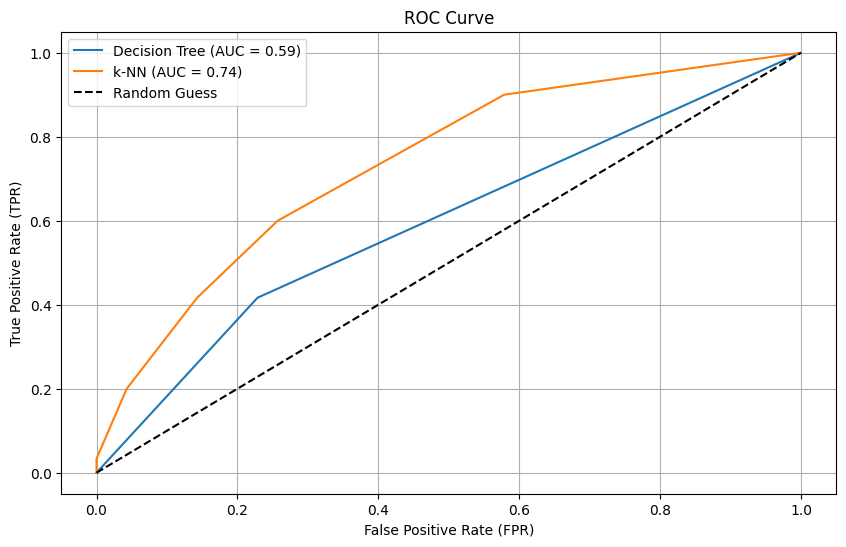

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/CreditDataset.csv'  # Sesuaikan path dengan lokasi file Anda
data = pd.read_csv(file_path)

# Pisahkan fitur dan target
X = data.drop(columns=['Class'])  # Fitur
y = data['Class']  # Target

# Encode fitur kategorikal dengan LabelEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Simpan encoder untuk referensi

# Normalisasi fitur numerik
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Split data menjadi train dan test set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inisialisasi model Decision Tree dan k-NN
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default k=5

# Latih kedua model
dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_dt = dt_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Probabilitas untuk ROC-AUC (hanya untuk kelas positif)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluasi performa kedua model
def evaluate_model(y_true, y_pred, y_prob):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, pos_label=2),
        "Recall": recall_score(y_true, y_pred, pos_label=2),
        "F1-Score": f1_score(y_true, y_pred, pos_label=2),
        "ROC-AUC": roc_auc_score(y_true, y_prob)
    }

dt_metrics = evaluate_model(y_test, y_pred_dt, y_prob_dt)
knn_metrics = evaluate_model(y_test, y_pred_knn, y_prob_knn)

# Print evaluasi
print("Decision Tree Metrics:", dt_metrics)
print("k-NN Metrics:", knn_metrics)

# Plot ROC Curve untuk kedua model
plt.figure(figsize=(10, 6))

# ROC Curve Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt, pos_label=2)
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {dt_metrics['ROC-AUC']:.2f})")

# ROC Curve k-NN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn, pos_label=2)
plt.plot(fpr_knn, tpr_knn, label=f"k-NN (AUC = {knn_metrics['ROC-AUC']:.2f})")

# Gaya plot
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid()
plt.show()
